In [1]:
from pymoo.problems import get_problem
from tqdm import tqdm
import pandas as pd
from utils import *
from pymoo.vendor.vendor_coco import COCOProblem
import random
import os
import seaborn as sns

coco_problem=24
coco_instance=1
dim=10
n_samples=500
n_evals = 1000

In [2]:
def get_problem(typ, n_var, scale):
    return ScaledCOCOProblem(typ, n_var=n_var, scale=scale)

def get_scale():
    log_lower = np.log(0.00001)
    log_upper = np.log(10000000)

    # Sample uniformly in the logarithmic space
    log_sample = np.random.uniform(log_lower, log_upper)

    # Convert the sample back to the linear space
    linear_sample = np.exp(log_sample)
    return linear_sample

In [3]:
for n_evals in [100, 200, 500, 1000]:
    for coco_problem in range(1, 25):
        for batch in range(1):
            file = f'scale_correlations/pc_{coco_problem}__pi_{coco_instance}__nevals_{n_evals}__batch_{batch}.csv'
            if os.path.exists(file):
                print(f'Files {file} already exist.')
            else:
                df = {'problem_class': [], 'problem_instance': [], 'y_diff': [], 'ga_diff': [], 'cmaes_diff': [], 'n_evals': []}
                for run in tqdm(range(1, 20)):
                    scaled = get_scale()
                    problem = get_problem(f"bbob-f{coco_problem}-{coco_instance}", n_var=dim, scale=scaled)
                    data = run_algorithms(problem, n_runs=1, algorithms=['GA', 'CMAES'], n_eval=n_evals)
                    sampling = LHS()
                    X = sampling(problem, dim*n_samples).get("X")
                    y = problem.evaluate(X).flatten()

                    y_diff = np.abs(np.min(y)-np.max(y))
                    ga_diff = data['GA'][0]-problem.evaluate(problem.pareto_set())[0][0]
                    cmaes_diff = data['CMAES'][0]-problem.evaluate(problem.pareto_set())[0][0]

                    df['problem_class'].append(coco_problem)
                    df['problem_instance'].append(coco_instance)
                    df['y_diff'].append(y_diff)
                    df['ga_diff'].append(ga_diff)
                    df['cmaes_diff'].append(cmaes_diff)
                    df['n_evals'].append(n_evals)
                df = pd.DataFrame(df)
                df.to_csv(file, index=False)

Files scale_correlations/pc_1__pi_1__nevals_100__batch_0.csv already exist.
Files scale_correlations/pc_2__pi_1__nevals_100__batch_0.csv already exist.
Files scale_correlations/pc_3__pi_1__nevals_100__batch_0.csv already exist.
Files scale_correlations/pc_4__pi_1__nevals_100__batch_0.csv already exist.
Files scale_correlations/pc_5__pi_1__nevals_100__batch_0.csv already exist.
Files scale_correlations/pc_6__pi_1__nevals_100__batch_0.csv already exist.
Files scale_correlations/pc_7__pi_1__nevals_100__batch_0.csv already exist.
Files scale_correlations/pc_8__pi_1__nevals_100__batch_0.csv already exist.
Files scale_correlations/pc_9__pi_1__nevals_100__batch_0.csv already exist.
Files scale_correlations/pc_10__pi_1__nevals_100__batch_0.csv already exist.
Files scale_correlations/pc_11__pi_1__nevals_100__batch_0.csv already exist.
Files scale_correlations/pc_12__pi_1__nevals_100__batch_0.csv already exist.
Files scale_correlations/pc_13__pi_1__nevals_100__batch_0.csv already exist.
Files sc

  0%|          | 0/19 [00:00<?, ?it/s]

Using 1000 evals


  5%|▌         | 1/19 [00:09<02:47,  9.29s/it]

Using 1000 evals


 11%|█         | 2/19 [00:18<02:37,  9.29s/it]

Using 1000 evals


 16%|█▌        | 3/19 [00:27<02:27,  9.20s/it]

Using 1000 evals


 21%|██        | 4/19 [00:36<02:16,  9.13s/it]

Using 1000 evals


 26%|██▋       | 5/19 [00:45<02:07,  9.12s/it]

Using 1000 evals


 32%|███▏      | 6/19 [00:54<01:58,  9.13s/it]

Using 1000 evals


 37%|███▋      | 7/19 [01:03<01:48,  9.03s/it]

Using 1000 evals


 42%|████▏     | 8/19 [01:12<01:38,  8.96s/it]

Using 1000 evals


 47%|████▋     | 9/19 [01:21<01:29,  8.91s/it]

Using 1000 evals


 53%|█████▎    | 10/19 [01:30<01:19,  8.88s/it]

Using 1000 evals


 58%|█████▊    | 11/19 [01:39<01:11,  8.92s/it]

Using 1000 evals


 63%|██████▎   | 12/19 [01:47<01:01,  8.85s/it]

Using 1000 evals


 68%|██████▊   | 13/19 [01:56<00:53,  8.86s/it]

Using 1000 evals


 74%|███████▎  | 14/19 [02:05<00:44,  8.87s/it]

Using 1000 evals


 79%|███████▉  | 15/19 [02:15<00:36,  9.06s/it]

Using 1000 evals


 84%|████████▍ | 16/19 [02:24<00:27,  9.08s/it]

Using 1000 evals


 89%|████████▉ | 17/19 [02:33<00:18,  9.24s/it]

Using 1000 evals


 95%|█████████▍| 18/19 [02:43<00:09,  9.24s/it]

Using 1000 evals


  0%|          | 0/19 [00:00<?, ?it/s]

Using 1000 evals


  5%|▌         | 1/19 [00:09<02:43,  9.10s/it]

Using 1000 evals


 11%|█         | 2/19 [00:18<02:35,  9.16s/it]

Using 1000 evals


 16%|█▌        | 3/19 [00:27<02:25,  9.12s/it]

Using 1000 evals


 21%|██        | 4/19 [00:36<02:16,  9.07s/it]

Using 1000 evals


 26%|██▋       | 5/19 [00:45<02:08,  9.19s/it]

Using 1000 evals


 32%|███▏      | 6/19 [00:54<01:59,  9.16s/it]

Using 1000 evals


 37%|███▋      | 7/19 [01:04<01:50,  9.23s/it]

Using 1000 evals


 42%|████▏     | 8/19 [01:13<01:40,  9.17s/it]

Using 1000 evals


 47%|████▋     | 9/19 [01:22<01:31,  9.19s/it]

Using 1000 evals


 53%|█████▎    | 10/19 [01:31<01:22,  9.13s/it]

Using 1000 evals


 58%|█████▊    | 11/19 [01:40<01:12,  9.10s/it]

Using 1000 evals


 63%|██████▎   | 12/19 [01:49<01:03,  9.06s/it]

Using 1000 evals


 68%|██████▊   | 13/19 [01:58<00:54,  9.07s/it]

Using 1000 evals


 74%|███████▎  | 14/19 [02:07<00:45,  9.11s/it]

Using 1000 evals


 79%|███████▉  | 15/19 [02:17<00:36,  9.14s/it]

Using 1000 evals


 84%|████████▍ | 16/19 [02:26<00:27,  9.15s/it]

Using 1000 evals


 89%|████████▉ | 17/19 [02:35<00:18,  9.13s/it]

Using 1000 evals


 95%|█████████▍| 18/19 [02:45<00:09,  9.33s/it]

Using 1000 evals


  0%|          | 0/19 [00:00<?, ?it/s]

Using 1000 evals


  5%|▌         | 1/19 [00:09<02:53,  9.64s/it]

Using 1000 evals


 11%|█         | 2/19 [00:18<02:38,  9.31s/it]

Using 1000 evals


 16%|█▌        | 3/19 [00:27<02:24,  9.02s/it]

Using 1000 evals


 21%|██        | 4/19 [00:36<02:15,  9.02s/it]

Using 1000 evals


 26%|██▋       | 5/19 [00:45<02:06,  9.04s/it]

Using 1000 evals


 32%|███▏      | 6/19 [00:54<01:57,  9.03s/it]

Using 1000 evals


 37%|███▋      | 7/19 [01:03<01:48,  9.02s/it]

Using 1000 evals


 42%|████▏     | 8/19 [01:12<01:38,  9.00s/it]

Using 1000 evals


 47%|████▋     | 9/19 [01:21<01:29,  8.97s/it]

Using 1000 evals


 53%|█████▎    | 10/19 [01:30<01:20,  8.95s/it]

Using 1000 evals


 58%|█████▊    | 11/19 [01:39<01:11,  8.92s/it]

Using 1000 evals


 63%|██████▎   | 12/19 [01:48<01:02,  9.00s/it]

Using 1000 evals


 68%|██████▊   | 13/19 [01:57<00:53,  8.97s/it]

Using 1000 evals


 74%|███████▎  | 14/19 [02:06<00:44,  8.99s/it]

Using 1000 evals


 79%|███████▉  | 15/19 [02:15<00:35,  8.95s/it]

Using 1000 evals


 84%|████████▍ | 16/19 [02:23<00:26,  8.91s/it]

Using 1000 evals


 89%|████████▉ | 17/19 [02:33<00:17,  8.97s/it]

Using 1000 evals


 95%|█████████▍| 18/19 [02:42<00:09,  9.01s/it]

Using 1000 evals


  0%|          | 0/19 [00:00<?, ?it/s]

Using 2000 evals


  5%|▌         | 1/19 [00:09<02:45,  9.19s/it]

Using 2000 evals


 11%|█         | 2/19 [00:18<02:38,  9.30s/it]

Using 2000 evals


 16%|█▌        | 3/19 [00:27<02:28,  9.31s/it]

Using 2000 evals


 21%|██        | 4/19 [00:37<02:19,  9.32s/it]

Using 2000 evals


 26%|██▋       | 5/19 [00:46<02:11,  9.38s/it]

Using 2000 evals


 32%|███▏      | 6/19 [00:56<02:02,  9.42s/it]

Using 2000 evals


 37%|███▋      | 7/19 [01:05<01:53,  9.44s/it]

Using 2000 evals


 42%|████▏     | 8/19 [01:15<01:44,  9.47s/it]

Using 2000 evals


 47%|████▋     | 9/19 [01:24<01:34,  9.45s/it]

Using 2000 evals


 53%|█████▎    | 10/19 [01:33<01:24,  9.40s/it]

Using 2000 evals


 58%|█████▊    | 11/19 [01:43<01:14,  9.33s/it]

Using 2000 evals


 63%|██████▎   | 12/19 [01:52<01:04,  9.28s/it]

Using 2000 evals


 68%|██████▊   | 13/19 [02:01<00:55,  9.29s/it]

Using 2000 evals


 74%|███████▎  | 14/19 [02:10<00:46,  9.31s/it]

Using 2000 evals


 79%|███████▉  | 15/19 [02:20<00:37,  9.36s/it]

Using 2000 evals


 84%|████████▍ | 16/19 [02:29<00:28,  9.36s/it]

Using 2000 evals


 89%|████████▉ | 17/19 [02:38<00:18,  9.30s/it]

Using 2000 evals


 95%|█████████▍| 18/19 [02:48<00:09,  9.29s/it]

Using 2000 evals


  0%|          | 0/19 [00:00<?, ?it/s]

Using 2000 evals


  5%|▌         | 1/19 [00:09<02:48,  9.34s/it]

Using 2000 evals


 11%|█         | 2/19 [00:18<02:39,  9.40s/it]

Using 2000 evals


 16%|█▌        | 3/19 [00:28<02:29,  9.35s/it]

Using 2000 evals


 21%|██        | 4/19 [00:37<02:20,  9.34s/it]

Using 2000 evals


 26%|██▋       | 5/19 [00:47<02:12,  9.44s/it]

Using 2000 evals


 32%|███▏      | 6/19 [00:56<02:02,  9.42s/it]

Using 2000 evals


 37%|███▋      | 7/19 [01:05<01:53,  9.44s/it]

Using 2000 evals


 42%|████▏     | 8/19 [01:15<01:44,  9.46s/it]

Using 2000 evals


 47%|████▋     | 9/19 [01:24<01:34,  9.48s/it]

Using 2000 evals


 53%|█████▎    | 10/19 [01:34<01:27,  9.67s/it]

Using 2000 evals


 58%|█████▊    | 11/19 [01:44<01:17,  9.74s/it]

Using 2000 evals


 63%|██████▎   | 12/19 [01:54<01:07,  9.65s/it]

Using 2000 evals


 68%|██████▊   | 13/19 [02:03<00:57,  9.56s/it]

Using 2000 evals


 74%|███████▎  | 14/19 [02:12<00:47,  9.47s/it]

Using 2000 evals


 79%|███████▉  | 15/19 [02:22<00:37,  9.49s/it]

Using 2000 evals


 84%|████████▍ | 16/19 [02:32<00:28,  9.52s/it]

Using 2000 evals


 89%|████████▉ | 17/19 [02:41<00:19,  9.52s/it]

Using 2000 evals


 95%|█████████▍| 18/19 [02:51<00:09,  9.57s/it]

Using 2000 evals


  0%|          | 0/19 [00:00<?, ?it/s]

Using 2000 evals


  5%|▌         | 1/19 [00:09<02:54,  9.68s/it]

Using 2000 evals


 11%|█         | 2/19 [00:19<02:41,  9.53s/it]

Using 2000 evals


 16%|█▌        | 3/19 [00:28<02:33,  9.62s/it]

Using 2000 evals


 21%|██        | 4/19 [00:38<02:24,  9.60s/it]

Using 2000 evals


 26%|██▋       | 5/19 [00:47<02:13,  9.56s/it]

Using 2000 evals


 32%|███▏      | 6/19 [00:57<02:04,  9.59s/it]

Using 2000 evals


 37%|███▋      | 7/19 [01:07<01:56,  9.68s/it]

Using 2000 evals


 42%|████▏     | 8/19 [01:16<01:45,  9.57s/it]

Using 2000 evals


 47%|████▋     | 9/19 [01:26<01:36,  9.63s/it]

Using 2000 evals


 53%|█████▎    | 10/19 [01:35<01:25,  9.53s/it]

Using 2000 evals


 58%|█████▊    | 11/19 [01:45<01:16,  9.53s/it]

Using 2000 evals


 63%|██████▎   | 12/19 [01:54<01:06,  9.54s/it]

Using 2000 evals


 68%|██████▊   | 13/19 [02:04<00:56,  9.45s/it]

Using 2000 evals


 74%|███████▎  | 14/19 [02:13<00:47,  9.43s/it]

Using 2000 evals


 79%|███████▉  | 15/19 [02:22<00:37,  9.38s/it]

Using 2000 evals


 84%|████████▍ | 16/19 [02:32<00:28,  9.41s/it]

Using 2000 evals


 89%|████████▉ | 17/19 [02:41<00:18,  9.40s/it]

Using 2000 evals


 95%|█████████▍| 18/19 [02:50<00:09,  9.36s/it]

Using 2000 evals


  0%|          | 0/19 [00:00<?, ?it/s]

Using 2000 evals


  5%|▌         | 1/19 [00:09<02:47,  9.32s/it]

Using 2000 evals


 11%|█         | 2/19 [00:18<02:38,  9.30s/it]

Using 2000 evals


 16%|█▌        | 3/19 [00:28<02:30,  9.40s/it]

Using 2000 evals


 21%|██        | 4/19 [00:37<02:22,  9.50s/it]

Using 2000 evals


 26%|██▋       | 5/19 [00:47<02:13,  9.56s/it]

Using 2000 evals


 32%|███▏      | 6/19 [00:56<02:02,  9.44s/it]

Using 2000 evals


 37%|███▋      | 7/19 [01:05<01:52,  9.37s/it]

Using 2000 evals


 42%|████▏     | 8/19 [01:15<01:42,  9.34s/it]

Using 2000 evals


 47%|████▋     | 9/19 [01:24<01:32,  9.27s/it]

Using 2000 evals


 53%|█████▎    | 10/19 [01:33<01:24,  9.35s/it]

Using 2000 evals


 58%|█████▊    | 11/19 [01:43<01:14,  9.32s/it]

Using 2000 evals


 63%|██████▎   | 12/19 [01:52<01:05,  9.41s/it]

Using 2000 evals


 68%|██████▊   | 13/19 [02:02<00:56,  9.42s/it]

Using 2000 evals


 74%|███████▎  | 14/19 [02:11<00:47,  9.42s/it]

Using 2000 evals


 79%|███████▉  | 15/19 [02:20<00:37,  9.40s/it]

Using 2000 evals


 84%|████████▍ | 16/19 [02:30<00:28,  9.43s/it]

Using 2000 evals


 89%|████████▉ | 17/19 [02:39<00:18,  9.42s/it]

Using 2000 evals


 95%|█████████▍| 18/19 [02:49<00:09,  9.56s/it]

Using 2000 evals


  0%|          | 0/19 [00:00<?, ?it/s]

Using 2000 evals


  5%|▌         | 1/19 [00:08<02:40,  8.92s/it]

Using 2000 evals


 11%|█         | 2/19 [00:18<02:38,  9.31s/it]

Using 2000 evals


 16%|█▌        | 3/19 [00:27<02:29,  9.31s/it]

Using 2000 evals


 21%|██        | 4/19 [00:37<02:23,  9.57s/it]

Using 2000 evals


 26%|██▋       | 5/19 [00:47<02:14,  9.64s/it]

Using 2000 evals


 32%|███▏      | 6/19 [00:56<02:04,  9.57s/it]

Using 2000 evals


 37%|███▋      | 7/19 [01:06<01:54,  9.55s/it]

Using 2000 evals


 42%|████▏     | 8/19 [01:16<01:44,  9.54s/it]

Using 2000 evals


 47%|████▋     | 9/19 [01:25<01:35,  9.55s/it]

Using 2000 evals


 53%|█████▎    | 10/19 [01:35<01:25,  9.53s/it]

Using 2000 evals


 58%|█████▊    | 11/19 [01:44<01:15,  9.49s/it]

Using 2000 evals


 63%|██████▎   | 12/19 [01:54<01:06,  9.51s/it]

Using 2000 evals


 68%|██████▊   | 13/19 [02:03<00:57,  9.56s/it]

Using 2000 evals


 74%|███████▎  | 14/19 [02:13<00:47,  9.58s/it]

Using 2000 evals


 79%|███████▉  | 15/19 [02:23<00:38,  9.72s/it]

Using 2000 evals


 84%|████████▍ | 16/19 [02:32<00:29,  9.67s/it]

Using 2000 evals


 89%|████████▉ | 17/19 [02:42<00:19,  9.70s/it]

Using 2000 evals


 95%|█████████▍| 18/19 [02:52<00:09,  9.82s/it]

Using 2000 evals


  0%|          | 0/19 [00:00<?, ?it/s]

Using 2000 evals


  5%|▌         | 1/19 [00:09<02:45,  9.18s/it]

Using 2000 evals


 11%|█         | 2/19 [00:18<02:36,  9.21s/it]

Using 2000 evals


 16%|█▌        | 3/19 [00:27<02:29,  9.34s/it]

Using 2000 evals


 21%|██        | 4/19 [00:37<02:19,  9.30s/it]

Using 2000 evals


 26%|██▋       | 5/19 [00:46<02:09,  9.27s/it]

Using 2000 evals


 32%|███▏      | 6/19 [00:55<02:02,  9.39s/it]

Using 2000 evals


 37%|███▋      | 7/19 [01:05<01:53,  9.46s/it]

Using 2000 evals


 42%|████▏     | 8/19 [01:15<01:44,  9.48s/it]

Using 2000 evals


 47%|████▋     | 9/19 [01:24<01:35,  9.55s/it]

Using 2000 evals


 53%|█████▎    | 10/19 [01:34<01:25,  9.52s/it]

Using 2000 evals


 58%|█████▊    | 11/19 [01:43<01:16,  9.56s/it]

Using 2000 evals


 63%|██████▎   | 12/19 [01:53<01:06,  9.52s/it]

Using 2000 evals


 68%|██████▊   | 13/19 [02:02<00:57,  9.53s/it]

Using 2000 evals


 74%|███████▎  | 14/19 [02:12<00:47,  9.51s/it]

Using 2000 evals


 79%|███████▉  | 15/19 [02:21<00:37,  9.43s/it]

Using 2000 evals


 84%|████████▍ | 16/19 [02:31<00:28,  9.44s/it]

Using 2000 evals


 89%|████████▉ | 17/19 [02:39<00:18,  9.14s/it]

Using 2000 evals


 95%|█████████▍| 18/19 [02:47<00:08,  8.87s/it]

Using 2000 evals


  0%|          | 0/19 [00:00<?, ?it/s]

Using 2000 evals


  5%|▌         | 1/19 [00:09<02:47,  9.32s/it]

Using 2000 evals


 11%|█         | 2/19 [00:18<02:40,  9.43s/it]

Using 2000 evals


 16%|█▌        | 3/19 [00:28<02:32,  9.51s/it]

Using 2000 evals


 21%|██        | 4/19 [00:37<02:22,  9.51s/it]

Using 2000 evals


 26%|██▋       | 5/19 [00:47<02:13,  9.55s/it]

Using 2000 evals


 32%|███▏      | 6/19 [00:57<02:04,  9.58s/it]

Using 2000 evals


 37%|███▋      | 7/19 [01:06<01:54,  9.53s/it]

Using 2000 evals


 42%|████▏     | 8/19 [01:16<01:45,  9.60s/it]

Using 2000 evals


 47%|████▋     | 9/19 [01:26<01:36,  9.62s/it]

Using 2000 evals


 53%|█████▎    | 10/19 [01:35<01:26,  9.59s/it]

Using 2000 evals


 58%|█████▊    | 11/19 [01:44<01:16,  9.54s/it]

Using 2000 evals


 63%|██████▎   | 12/19 [01:54<01:06,  9.56s/it]

Using 2000 evals


 68%|██████▊   | 13/19 [02:04<00:57,  9.59s/it]

Using 2000 evals


 74%|███████▎  | 14/19 [02:13<00:47,  9.54s/it]

Using 2000 evals


 79%|███████▉  | 15/19 [02:23<00:38,  9.50s/it]

Using 2000 evals


 84%|████████▍ | 16/19 [02:32<00:28,  9.58s/it]

Using 2000 evals


 89%|████████▉ | 17/19 [02:42<00:19,  9.54s/it]

Using 2000 evals


 95%|█████████▍| 18/19 [02:51<00:09,  9.57s/it]

Using 2000 evals


  0%|          | 0/19 [00:00<?, ?it/s]

Using 2000 evals


  5%|▌         | 1/19 [00:10<03:06, 10.35s/it]

Using 2000 evals


 11%|█         | 2/19 [00:20<02:52, 10.16s/it]

Using 2000 evals


 16%|█▌        | 3/19 [00:30<02:40, 10.02s/it]

Using 2000 evals


 21%|██        | 4/19 [00:39<02:27,  9.85s/it]

Using 2000 evals


 26%|██▋       | 5/19 [00:49<02:16,  9.72s/it]

Using 2000 evals


 32%|███▏      | 6/19 [00:58<02:05,  9.68s/it]

Using 2000 evals


 37%|███▋      | 7/19 [01:08<01:54,  9.55s/it]

Using 2000 evals


 42%|████▏     | 8/19 [01:17<01:45,  9.61s/it]

Using 2000 evals


 47%|████▋     | 9/19 [01:27<01:35,  9.59s/it]

Using 2000 evals


 53%|█████▎    | 10/19 [01:36<01:24,  9.37s/it]

Using 2000 evals


 58%|█████▊    | 11/19 [01:45<01:15,  9.42s/it]

Using 2000 evals


 63%|██████▎   | 12/19 [01:55<01:06,  9.47s/it]

Using 2000 evals


 68%|██████▊   | 13/19 [02:04<00:56,  9.48s/it]

Using 2000 evals


 74%|███████▎  | 14/19 [02:14<00:47,  9.49s/it]

Using 2000 evals


 79%|███████▉  | 15/19 [02:23<00:37,  9.48s/it]

Using 2000 evals


 84%|████████▍ | 16/19 [02:33<00:28,  9.47s/it]

Using 2000 evals


 89%|████████▉ | 17/19 [02:42<00:18,  9.41s/it]

Using 2000 evals


 95%|█████████▍| 18/19 [02:51<00:09,  9.35s/it]

Using 2000 evals


  0%|          | 0/19 [00:00<?, ?it/s]

Using 2000 evals


  5%|▌         | 1/19 [00:09<02:54,  9.71s/it]

Using 2000 evals


 11%|█         | 2/19 [00:18<02:40,  9.46s/it]

Using 2000 evals


 16%|█▌        | 3/19 [00:28<02:31,  9.44s/it]

Using 2000 evals


 21%|██        | 4/19 [00:37<02:22,  9.48s/it]

Using 2000 evals


 26%|██▋       | 5/19 [00:47<02:12,  9.45s/it]

Using 2000 evals


 32%|███▏      | 6/19 [00:56<02:01,  9.38s/it]

Using 2000 evals


 37%|███▋      | 7/19 [01:05<01:51,  9.33s/it]

Using 2000 evals


 42%|████▏     | 8/19 [01:15<01:45,  9.57s/it]

Using 2000 evals


 47%|████▋     | 9/19 [01:25<01:34,  9.46s/it]

Using 2000 evals


 53%|█████▎    | 10/19 [01:34<01:25,  9.47s/it]

Using 2000 evals


 58%|█████▊    | 11/19 [01:43<01:15,  9.39s/it]

Using 2000 evals


 63%|██████▎   | 12/19 [01:53<01:05,  9.36s/it]

Using 2000 evals


 68%|██████▊   | 13/19 [02:02<00:56,  9.41s/it]

Using 2000 evals


 74%|███████▎  | 14/19 [02:11<00:46,  9.40s/it]

Using 2000 evals


 79%|███████▉  | 15/19 [02:20<00:36,  9.13s/it]

Using 2000 evals


 84%|████████▍ | 16/19 [02:28<00:26,  8.91s/it]

Using 2000 evals


 89%|████████▉ | 17/19 [02:37<00:17,  8.96s/it]

Using 2000 evals


 95%|█████████▍| 18/19 [02:47<00:09,  9.07s/it]

Using 2000 evals


  0%|          | 0/19 [00:00<?, ?it/s]

Using 2000 evals


  5%|▌         | 1/19 [00:09<02:52,  9.58s/it]

Using 2000 evals


 11%|█         | 2/19 [00:19<02:42,  9.57s/it]

Using 2000 evals


 16%|█▌        | 3/19 [00:28<02:32,  9.50s/it]

Using 2000 evals


 21%|██        | 4/19 [00:38<02:22,  9.52s/it]

Using 2000 evals


 26%|██▋       | 5/19 [00:47<02:12,  9.47s/it]

Using 2000 evals


 32%|███▏      | 6/19 [00:57<02:03,  9.52s/it]

Using 2000 evals


 37%|███▋      | 7/19 [01:06<01:54,  9.54s/it]

Using 2000 evals


 42%|████▏     | 8/19 [01:16<01:45,  9.60s/it]

Using 2000 evals


 47%|████▋     | 9/19 [01:25<01:35,  9.57s/it]

Using 2000 evals


 53%|█████▎    | 10/19 [01:35<01:25,  9.51s/it]

Using 2000 evals


 58%|█████▊    | 11/19 [01:44<01:15,  9.46s/it]

Using 2000 evals


 63%|██████▎   | 12/19 [01:54<01:06,  9.46s/it]

Using 2000 evals


 68%|██████▊   | 13/19 [02:03<00:56,  9.43s/it]

Using 2000 evals


 74%|███████▎  | 14/19 [02:12<00:47,  9.44s/it]

Using 2000 evals


 79%|███████▉  | 15/19 [02:22<00:37,  9.43s/it]

Using 2000 evals


 84%|████████▍ | 16/19 [02:31<00:28,  9.44s/it]

Using 2000 evals


 89%|████████▉ | 17/19 [02:41<00:18,  9.47s/it]

Using 2000 evals


 95%|█████████▍| 18/19 [02:50<00:09,  9.25s/it]

Using 2000 evals


  0%|          | 0/19 [00:00<?, ?it/s]

Using 2000 evals


  5%|▌         | 1/19 [00:08<02:33,  8.55s/it]

Using 2000 evals


 11%|█         | 2/19 [00:16<02:19,  8.21s/it]

Using 2000 evals


 16%|█▌        | 3/19 [00:25<02:14,  8.41s/it]

Using 2000 evals


 21%|██        | 4/19 [00:35<02:14,  8.97s/it]

Using 2000 evals


 26%|██▋       | 5/19 [00:44<02:07,  9.13s/it]

Using 2000 evals


 32%|███▏      | 6/19 [00:54<02:00,  9.30s/it]

Using 2000 evals


 37%|███▋      | 7/19 [01:03<01:52,  9.39s/it]

Using 2000 evals


 42%|████▏     | 8/19 [01:13<01:43,  9.41s/it]

Using 2000 evals


 47%|████▋     | 9/19 [01:22<01:34,  9.42s/it]

Using 2000 evals


 53%|█████▎    | 10/19 [01:31<01:24,  9.44s/it]

Using 2000 evals


 58%|█████▊    | 11/19 [01:41<01:15,  9.49s/it]

Using 2000 evals


 63%|██████▎   | 12/19 [01:51<01:06,  9.54s/it]

Using 2000 evals


 68%|██████▊   | 13/19 [02:01<00:58,  9.68s/it]

Using 2000 evals


 74%|███████▎  | 14/19 [02:11<00:48,  9.75s/it]

Using 2000 evals


 79%|███████▉  | 15/19 [02:20<00:39,  9.76s/it]

Using 2000 evals


 84%|████████▍ | 16/19 [02:30<00:29,  9.75s/it]

Using 2000 evals


 89%|████████▉ | 17/19 [02:40<00:19,  9.69s/it]

Using 2000 evals


 95%|█████████▍| 18/19 [02:49<00:09,  9.67s/it]

Using 2000 evals


  0%|          | 0/19 [00:00<?, ?it/s]

Using 2000 evals


  5%|▌         | 1/19 [00:09<02:45,  9.21s/it]

Using 2000 evals


 11%|█         | 2/19 [00:18<02:41,  9.52s/it]

Using 2000 evals


 16%|█▌        | 3/19 [00:28<02:32,  9.53s/it]

Using 2000 evals


 21%|██        | 4/19 [00:37<02:21,  9.46s/it]

Using 2000 evals


 26%|██▋       | 5/19 [00:47<02:12,  9.47s/it]

Using 2000 evals


 32%|███▏      | 6/19 [00:56<02:02,  9.46s/it]

Using 2000 evals


 37%|███▋      | 7/19 [01:06<01:53,  9.46s/it]

Using 2000 evals


 42%|████▏     | 8/19 [01:15<01:43,  9.43s/it]

Using 2000 evals


 47%|████▋     | 9/19 [01:25<01:34,  9.45s/it]

Using 2000 evals


 53%|█████▎    | 10/19 [01:34<01:25,  9.45s/it]

Using 2000 evals


 58%|█████▊    | 11/19 [01:43<01:15,  9.45s/it]

Using 2000 evals


 63%|██████▎   | 12/19 [01:53<01:06,  9.47s/it]

Using 2000 evals


 68%|██████▊   | 13/19 [02:02<00:56,  9.42s/it]

Using 2000 evals


 74%|███████▎  | 14/19 [02:12<00:47,  9.41s/it]

Using 2000 evals


 79%|███████▉  | 15/19 [02:21<00:37,  9.45s/it]

Using 2000 evals


 84%|████████▍ | 16/19 [02:31<00:28,  9.45s/it]

Using 2000 evals


 89%|████████▉ | 17/19 [02:40<00:18,  9.42s/it]

Using 2000 evals


 95%|█████████▍| 18/19 [02:50<00:09,  9.46s/it]

Using 2000 evals


  0%|          | 0/19 [00:00<?, ?it/s]

Using 2000 evals


  5%|▌         | 1/19 [00:08<02:40,  8.91s/it]

Using 2000 evals


 11%|█         | 2/19 [00:17<02:26,  8.60s/it]

Using 2000 evals


 16%|█▌        | 3/19 [00:25<02:16,  8.51s/it]

Using 2000 evals


 21%|██        | 4/19 [00:33<02:06,  8.42s/it]

Using 2000 evals


 26%|██▋       | 5/19 [00:43<02:03,  8.79s/it]

Using 2000 evals


 32%|███▏      | 6/19 [00:52<01:57,  9.02s/it]

Using 2000 evals


 37%|███▋      | 7/19 [01:02<01:49,  9.12s/it]

Using 2000 evals


 42%|████▏     | 8/19 [01:11<01:41,  9.19s/it]

Using 2000 evals


 47%|████▋     | 9/19 [01:20<01:32,  9.24s/it]

Using 2000 evals


 53%|█████▎    | 10/19 [01:30<01:23,  9.29s/it]

Using 2000 evals


 58%|█████▊    | 11/19 [01:39<01:14,  9.35s/it]

Using 2000 evals


 63%|██████▎   | 12/19 [01:49<01:05,  9.32s/it]

Using 2000 evals


 68%|██████▊   | 13/19 [01:58<00:56,  9.38s/it]

Using 2000 evals


 74%|███████▎  | 14/19 [02:08<00:47,  9.41s/it]

Using 2000 evals


 79%|███████▉  | 15/19 [02:17<00:37,  9.43s/it]

Using 2000 evals


 84%|████████▍ | 16/19 [02:26<00:28,  9.41s/it]

Using 2000 evals


 89%|████████▉ | 17/19 [02:36<00:18,  9.47s/it]

Using 2000 evals


 95%|█████████▍| 18/19 [02:45<00:09,  9.45s/it]

Using 2000 evals


  0%|          | 0/19 [00:00<?, ?it/s]

Using 2000 evals


  5%|▌         | 1/19 [00:09<02:50,  9.45s/it]

Using 2000 evals


 11%|█         | 2/19 [00:18<02:40,  9.44s/it]

Using 2000 evals


 16%|█▌        | 3/19 [00:28<02:32,  9.50s/it]

Using 2000 evals


 21%|██        | 4/19 [00:37<02:21,  9.44s/it]

Using 2000 evals


 26%|██▋       | 5/19 [00:47<02:13,  9.52s/it]

Using 2000 evals


 32%|███▏      | 6/19 [00:57<02:05,  9.66s/it]

Using 2000 evals


 37%|███▋      | 7/19 [01:07<01:57,  9.83s/it]

Using 2000 evals


 42%|████▏     | 8/19 [01:17<01:48,  9.88s/it]

Using 2000 evals


 47%|████▋     | 9/19 [01:26<01:37,  9.72s/it]

Using 2000 evals


 53%|█████▎    | 10/19 [01:36<01:26,  9.63s/it]

Using 2000 evals


 58%|█████▊    | 11/19 [01:45<01:15,  9.49s/it]

Using 2000 evals


 63%|██████▎   | 12/19 [01:54<01:06,  9.45s/it]

Using 2000 evals


 68%|██████▊   | 13/19 [02:04<00:56,  9.49s/it]

Using 2000 evals


 74%|███████▎  | 14/19 [02:13<00:47,  9.43s/it]

Using 2000 evals


 79%|███████▉  | 15/19 [02:22<00:37,  9.35s/it]

Using 2000 evals


 84%|████████▍ | 16/19 [02:32<00:28,  9.39s/it]

Using 2000 evals


 89%|████████▉ | 17/19 [02:41<00:18,  9.42s/it]

Using 2000 evals


 95%|█████████▍| 18/19 [02:51<00:09,  9.54s/it]

Using 2000 evals


  0%|          | 0/19 [00:00<?, ?it/s]

Using 2000 evals


  5%|▌         | 1/19 [00:10<03:01, 10.09s/it]

Using 2000 evals


 11%|█         | 2/19 [00:20<02:52, 10.16s/it]

Using 2000 evals


 16%|█▌        | 3/19 [00:29<02:38,  9.92s/it]

Using 2000 evals


 21%|██        | 4/19 [00:39<02:25,  9.71s/it]

Using 2000 evals


 26%|██▋       | 5/19 [00:48<02:14,  9.61s/it]

Using 2000 evals


 32%|███▏      | 6/19 [00:58<02:04,  9.59s/it]

Using 2000 evals


 37%|███▋      | 7/19 [01:08<01:55,  9.64s/it]

Using 2000 evals


 42%|████▏     | 8/19 [01:17<01:46,  9.64s/it]

Using 2000 evals


 47%|████▋     | 9/19 [01:27<01:36,  9.65s/it]

Using 2000 evals


 53%|█████▎    | 10/19 [01:37<01:27,  9.67s/it]

Using 2000 evals


 58%|█████▊    | 11/19 [01:46<01:16,  9.62s/it]

Using 2000 evals


 63%|██████▎   | 12/19 [01:56<01:08,  9.85s/it]

Using 2000 evals


 68%|██████▊   | 13/19 [02:06<00:58,  9.82s/it]

Using 2000 evals


 74%|███████▎  | 14/19 [02:15<00:47,  9.55s/it]

Using 2000 evals


 79%|███████▉  | 15/19 [02:23<00:36,  9.05s/it]

Using 2000 evals


 84%|████████▍ | 16/19 [02:31<00:26,  8.71s/it]

Using 2000 evals


 89%|████████▉ | 17/19 [02:39<00:16,  8.38s/it]

Using 2000 evals


 95%|█████████▍| 18/19 [02:47<00:08,  8.34s/it]

Using 2000 evals


  0%|          | 0/19 [00:00<?, ?it/s]

Using 2000 evals


  5%|▌         | 1/19 [00:08<02:25,  8.09s/it]

Using 2000 evals


 11%|█         | 2/19 [00:16<02:23,  8.46s/it]

Using 2000 evals


 16%|█▌        | 3/19 [00:25<02:14,  8.39s/it]

Using 2000 evals


 21%|██        | 4/19 [00:34<02:14,  8.95s/it]

Using 2000 evals


 26%|██▋       | 5/19 [00:44<02:09,  9.23s/it]

Using 2000 evals


 32%|███▏      | 6/19 [00:54<02:02,  9.43s/it]

Using 2000 evals


 37%|███▋      | 7/19 [01:04<01:53,  9.49s/it]

Using 2000 evals


 42%|████▏     | 8/19 [01:14<01:47,  9.74s/it]

Using 2000 evals


 47%|████▋     | 9/19 [01:24<01:38,  9.84s/it]

Using 2000 evals


 53%|█████▎    | 10/19 [01:34<01:29,  9.95s/it]

Using 2000 evals


 58%|█████▊    | 11/19 [01:47<01:26, 10.80s/it]

Using 2000 evals


 63%|██████▎   | 12/19 [02:07<01:35, 13.58s/it]

Using 2000 evals


 68%|██████▊   | 13/19 [02:17<01:14, 12.44s/it]

Using 2000 evals


 74%|███████▎  | 14/19 [02:26<00:58, 11.64s/it]

Using 2000 evals


 79%|███████▉  | 15/19 [02:38<00:46, 11.69s/it]

Using 2000 evals


 84%|████████▍ | 16/19 [02:48<00:33, 11.10s/it]

Using 2000 evals


 89%|████████▉ | 17/19 [02:58<00:21, 10.72s/it]

Using 2000 evals


 95%|█████████▍| 18/19 [03:08<00:10, 10.56s/it]

Using 2000 evals


  0%|          | 0/19 [00:00<?, ?it/s]

Using 2000 evals


  5%|▌         | 1/19 [00:08<02:32,  8.46s/it]

Using 2000 evals


 11%|█         | 2/19 [00:18<02:35,  9.15s/it]

Using 2000 evals


 16%|█▌        | 3/19 [00:27<02:27,  9.19s/it]

Using 2000 evals


 21%|██        | 4/19 [00:36<02:14,  9.00s/it]

Using 2000 evals


 26%|██▋       | 5/19 [00:45<02:09,  9.22s/it]

Using 2000 evals


 32%|███▏      | 6/19 [00:55<02:00,  9.29s/it]

Using 2000 evals


 37%|███▋      | 7/19 [01:04<01:52,  9.35s/it]

Using 2000 evals


 42%|████▏     | 8/19 [01:14<01:43,  9.41s/it]

Using 2000 evals


 47%|████▋     | 9/19 [01:23<01:34,  9.49s/it]

Using 2000 evals


 53%|█████▎    | 10/19 [01:33<01:27,  9.71s/it]

Using 2000 evals


 58%|█████▊    | 11/19 [01:43<01:17,  9.65s/it]

Using 2000 evals


 63%|██████▎   | 12/19 [01:52<01:06,  9.55s/it]

Using 2000 evals


 68%|██████▊   | 13/19 [02:02<00:57,  9.52s/it]

Using 2000 evals


 74%|███████▎  | 14/19 [02:11<00:47,  9.51s/it]

Using 2000 evals


 79%|███████▉  | 15/19 [02:21<00:38,  9.57s/it]

Using 2000 evals


 84%|████████▍ | 16/19 [02:31<00:28,  9.60s/it]

Using 2000 evals


 89%|████████▉ | 17/19 [02:40<00:19,  9.59s/it]

Using 2000 evals


 95%|█████████▍| 18/19 [02:50<00:09,  9.65s/it]

Using 2000 evals


  0%|          | 0/19 [00:00<?, ?it/s]

Using 2000 evals


  5%|▌         | 1/19 [00:09<02:54,  9.72s/it]

Using 2000 evals


 11%|█         | 2/19 [00:19<02:43,  9.61s/it]

Using 2000 evals


 16%|█▌        | 3/19 [00:28<02:32,  9.55s/it]

Using 2000 evals


 21%|██        | 4/19 [00:38<02:22,  9.53s/it]

Using 2000 evals


 26%|██▋       | 5/19 [00:46<02:07,  9.08s/it]

Using 2000 evals


 32%|███▏      | 6/19 [00:54<01:53,  8.71s/it]

Using 2000 evals


 37%|███▋      | 7/19 [01:02<01:42,  8.51s/it]

Using 2000 evals


 42%|████▏     | 8/19 [01:12<01:37,  8.83s/it]

Using 2000 evals


 47%|████▋     | 9/19 [01:21<01:30,  9.04s/it]

Using 2000 evals


 53%|█████▎    | 10/19 [01:38<01:42, 11.34s/it]

Using 2000 evals


 58%|█████▊    | 11/19 [02:02<02:02, 15.37s/it]

Using 2000 evals


 63%|██████▎   | 12/19 [02:22<01:56, 16.68s/it]

Using 2000 evals


 68%|██████▊   | 13/19 [02:32<01:27, 14.58s/it]

Using 2000 evals


 74%|███████▎  | 14/19 [02:42<01:06, 13.27s/it]

Using 2000 evals


 79%|███████▉  | 15/19 [02:51<00:48, 12.11s/it]

Using 2000 evals


 84%|████████▍ | 16/19 [03:01<00:34, 11.39s/it]

Using 2000 evals


 89%|████████▉ | 17/19 [03:11<00:21, 10.89s/it]

Using 2000 evals


 95%|█████████▍| 18/19 [03:20<00:10, 10.54s/it]

Using 2000 evals


  0%|          | 0/19 [00:00<?, ?it/s]

Using 2000 evals


  5%|▌         | 1/19 [00:09<02:51,  9.56s/it]

Using 2000 evals


 11%|█         | 2/19 [00:19<02:43,  9.61s/it]

Using 2000 evals


 16%|█▌        | 3/19 [00:28<02:34,  9.64s/it]

Using 2000 evals


 21%|██        | 4/19 [00:38<02:24,  9.62s/it]

Using 2000 evals


 26%|██▋       | 5/19 [00:48<02:15,  9.67s/it]

Using 2000 evals


 32%|███▏      | 6/19 [00:57<02:03,  9.48s/it]

Using 2000 evals


 32%|███▏      | 6/19 [01:02<02:15, 10.41s/it]

KeyboardInterrupt



In [4]:
df = pd.concat([pd.read_csv(file) for file in glob.glob('scale_correlations/*')], ignore_index=True)
df

,problem_class,problem_instance,y_diff,ga_diff,cmaes_diff,n_evals
0,8,1,1.352507e+09,3.721755e+03,7.199654e+03,200
1,8,1,8.633192e+01,3.671485e-04,7.227412e-04,200
2,8,1,9.340117e+03,7.511080e-02,6.241852e-02,200
3,8,1,1.217244e+01,1.047834e-04,6.897659e-05,200
4,8,1,4.429686e+12,3.477538e+07,2.470725e+07,200
...,...,...,...,...,...,...
793,5,1,1.549031e+00,2.071807e-05,1.871062e-09,200
794,5,1,3.215182e-03,4.001741e-08,5.614772e-12,200
795,5,1,3.435637e+07,3.461525e+03,3.129770e-01,200
796,5,1,2.024657e+07,1.065344e+03,1.141524e-01,200


In [5]:
df.problem_class.unique()

array([ 8,  5, 18, 21, 13,  3, 24, 16,  9, 15, 14,  7, 17,  4, 20,  6, 23,
       19, 12,  1, 22, 11, 10,  2])

In [6]:
df.n_evals.unique()

array([200, 100])

(1e-08, 10000000000)

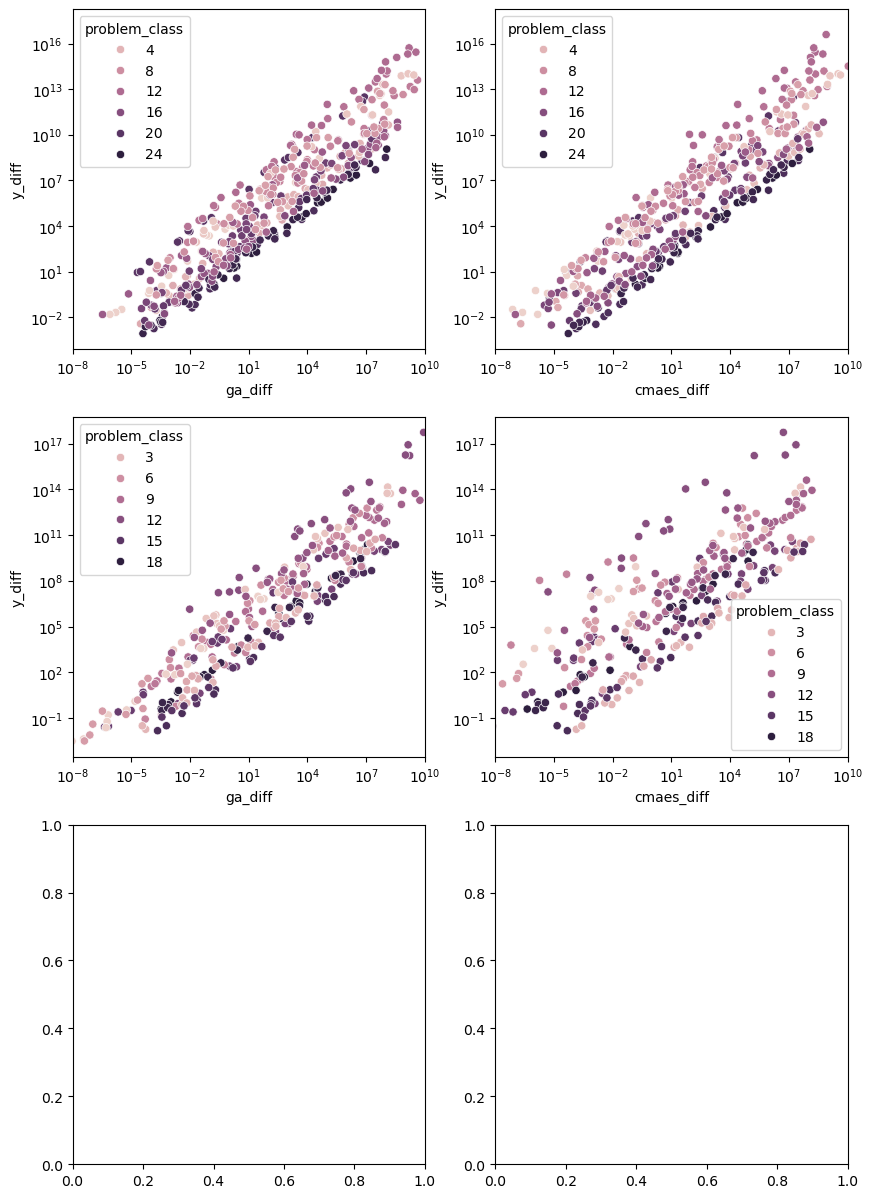

In [16]:
fig, axs = plt.subplots(3, 2, figsize=(10, 15))

sns.scatterplot(x='ga_diff', y='y_diff', ax=axs[0, 0], hue="problem_class", data=df.query('n_evals==100'))
axs[0, 0].set(xscale="log", yscale="log")
axs[0, 0].set_xlim([0.00000001, 10**10])
sns.scatterplot(x='cmaes_diff', y='y_diff', ax=axs[0, 1], hue="problem_class", data=df.query('n_evals==100'))
axs[0, 1].set(xscale="log", yscale="log")
axs[0, 1].set_xlim([0.00000001, 10**10])

sns.scatterplot(x='ga_diff', y='y_diff', ax=axs[1, 0], hue="problem_class", data=df.query('n_evals==200'))
axs[1, 0].set(xscale="log", yscale="log")
axs[1, 0].set_xlim([0.00000001, 10**10])
sns.scatterplot(x='cmaes_diff', y='y_diff', ax=axs[1, 1], hue="problem_class", data=df.query('n_evals==200'))
axs[1, 1].set(xscale="log", yscale="log")
axs[1, 1].set_xlim([0.00000001, 10**10])

In [ ]:
dcsdf=sdfsf

In [ ]:
for n_evals in [100, 200, 500, 1000]:
    for coco_problem in range(1, 25):
        file = f'scale_correlations/pc_{coco_problem}__pi_{coco_instance}__nevals_{n_evals}.csv'
        if os.path.exists(file):
            print(f'Files {file} already exist.')
        else:
            df = {'problem_class': [], 'problem_instance': [], 'y_diff': [], 'ga_diff': [], 'cmaes_diff': [], 'n_evals': []}
            for run in tqdm(range(1, 1000)):
                scaled = get_scale()
                problem = get_problem(f"bbob-f{coco_problem}-{coco_instance}", n_var=dim, scale=scaled)
                data = run_algorithms(problem, n_runs=1, algorithms=['GA', 'CMAES'], n_eval=n_evals)
                sampling = LHS()
                X = sampling(problem, dim*n_samples).get("X")
                y = problem.evaluate(X).flatten()

                with problem_creation_lock:
                    y_diff = np.abs(np.min(y)-np.max(y))
                    ga_diff = data['GA'][0]-problem.evaluate(problem.pareto_set())[0][0]
                    cmaes_diff = data['CMAES'][0]-problem.evaluate(problem.pareto_set())[0][0]

                df['problem_class'].append(coco_problem)
                df['problem_instance'].append(coco_instance)
                df['y_diff'].append(y_diff)
                df['ga_diff'].append(ga_diff)
                df['cmaes_diff'].append(cmaes_diff)
                df['n_evals'].append(n_evals)
            df = pd.DataFrame(df)
            df.to_csv(file, index=False)

In [ ]:
#import os
#import pandas as pd
#from tqdm import tqdm
#from multiprocessing import Pool
#
## Define a function to process each combination of n_evals and coco_problem
#def process_combination(args):
#    n_evals, coco_problem = args
#    file = f'scale_correlations/pc_{coco_problem}__pi_{coco_instance}__nevals_{n_evals}.csv'
#    if os.path.exists(file):
#        print(f'Files {file} already exist.')
#    else:
#        df = {'problem_class': [], 'problem_instance': [], 'y_diff': [], 'ga_diff': [], 'cmaes_diff': [], 'n_evals': []}
#        for run in tqdm(range(1, 1000)):
#            scaled = get_scale()
#            problem = get_problem(f"bbob-f{coco_problem}-{coco_instance}", n_var=dim, scale=scaled)
#            data = run_algorithms(problem, n_runs=1, algorithms=['GA', 'CMAES'], n_eval=n_evals)
#            sampling = LHS()
#            X = sampling(problem, dim*n_samples).get("X")
#            y = problem.evaluate(X).flatten()
#
#            y_diff = np.abs(np.min(y)-np.max(y))
#            ga_diff = data['GA'][0]-problem.evaluate(problem.pareto_set())[0][0]
#            cmaes_diff = data['CMAES'][0]-problem.evaluate(problem.pareto_set())[0][0]
#
#            df['problem_class'].append(coco_problem)
#            df['problem_instance'].append(coco_instance)
#            df['y_diff'].append(y_diff)
#            df['ga_diff'].append(ga_diff)
#            df['cmaes_diff'].append(cmaes_diff)
#            df['n_evals'].append(n_evals)
#        df = pd.DataFrame(df)
#        df.to_csv(file, index=False)
#
## Define the range of n_evals and coco_problem
#n_evals_list = [100, 200, 500, 1000]
#coco_problem_range = range(1, 25)
#
## Generate combinations
#combinations = [(n_evals, coco_problem) for n_evals in n_evals_list for coco_problem in coco_problem_range]
#
## Initialize Pool with number of processes
#with Pool(processes=10) as pool:
#    pool.map(process_combination, combinations)

In [ ]:
df1 = pd.read_csv('scale_correlations/pc_5__pi_1__nevals_100.csv', index_col=False)
df2 = pd.read_csv('scale_correlations/pc_24__pi_1__nevals_100.csv', index_col=False)
df3 = pd.read_csv('scale_correlations/pc_24__pi_1__nevals_1000.csv', index_col=False)

df2

In [ ]:
import seaborn as sns
# Generate some synthetic data
#data1 = np.random.normal(loc=0, scale=1, size=100)
#data2 = np.random.normal(loc=5, scale=2, size=100)
#data_x = np.random.rand(100)
#data_y = data_x * 2 + np.random.normal(loc=0, scale=0.1, size=100)

# Create a 3x2 subplot grid
fig, axs = plt.subplots(3, 2, figsize=(10, 15))

sns.scatterplot(x=df1['ga_diff'], y=df1['y_diff'], ax=axs[0, 0], color='red')
axs[0, 0].set(xscale="log", yscale="log")
sns.scatterplot(x=df1['cmaes_diff'], y=df1['y_diff'], ax=axs[0, 1], color='blue')
axs[0, 1].set(xscale="log", yscale="log")

sns.scatterplot(x=df2['ga_diff'], y=df2['y_diff'], ax=axs[1, 0], color='red')
axs[1, 0].set(xscale="log", yscale="log")
sns.scatterplot(x=df2['cmaes_diff'], y=df2['y_diff'], ax=axs[1, 1], color='blue')
axs[1, 1].set(xscale="log", yscale="log")


sns.scatterplot(x=df3['ga_diff'], y=df3['y_diff'], ax=axs[2, 0], color='red')
axs[2, 0].set(xscale="log", yscale="log")
sns.scatterplot(x=df3['cmaes_diff'], y=df3['y_diff'], ax=axs[2, 1], color='blue')
axs[2, 1].set(xscale="log", yscale="log")



#sns.histplot(data2, kde=True, ax=axs[0, 1], color='green')
#axs[0, 1].set_title('Histogram of Data2')

#sns.scatterplot(x=data_x, y=data_y, ax=axs[1, 0], color='red')
#axs[1, 0].set_title('Scatter Plot')

#sns.lineplot(x=data_x, y=data_y, ax=axs[1, 1])
#axs[1, 1].set_title('Line Plot')

#sns.boxplot(data=[data1, data2], ax=axs[2, 0])
#axs[2, 0].set_title('Box Plot')

#sns.violinplot(data=[data1, data2], ax=axs[2, 1])
#axs[2, 1].set_title('Violin Plot')

plt.tight_layout()
plt.show()

In [ ]:
df2 = pd.read_csv('scale_correlations/pc_1__pi_1__nevals_100.csv', index_col=False)
df1 = pd.read_csv('scale_correlations/pc_18__pi_1__nevals_100.csv', index_col=False)
df3 = pd.read_csv('scale_correlations/pc_24__pi_1__nevals_100.csv', index_col=False)

df_all = pd.concat([df1, df2, df3])
sns.scatterplot(data=df_all, x='cmaes_diff', y='y_diff', hue='problem_class')
plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale
plt.savefig(f'figures/types_of_errors.pdf', bbox_inches='tight', pad_inches=0)

In [ ]:
n_evals = 500
for coco_instance in [1, 2]:
    for coco_problem in range(1, 25):
        file = f'coco_scale/pc_{coco_problem}__pi_{coco_instance}__nevals_{n_evals}.csv'
        if os.path.exists(file):
            print(f'Files {file} already exist.')
        else:
            df = {'problem_class': [], 'problem_instance': [], 'y_diff': [], 'ga_diff': [], 'cmaes_diff': [], 'n_evals': []}
            for run in tqdm(range(1, 100)):
                problem = COCOProblem(f"bbob-f{coco_problem}-{coco_instance}", n_var=dim)
                data = run_algorithms(problem, n_runs=1, algorithms=['GA', 'CMAES'], n_eval=n_evals)
                sampling = LHS()
                X = sampling(problem, dim*n_samples).get("X")
                y = problem.evaluate(X).flatten()

                y_diff = np.abs(np.min(y)-np.max(y))
                ga_diff = data['GA'][0]-problem.evaluate(problem.pareto_set())[0][0]
                cmaes_diff = data['CMAES'][0]-problem.evaluate(problem.pareto_set())[0][0]

                df['problem_class'].append(coco_problem)
                df['problem_instance'].append(coco_instance)
                df['y_diff'].append(y_diff)
                df['ga_diff'].append(ga_diff)
                df['cmaes_diff'].append(cmaes_diff)
                df['n_evals'].append(n_evals)
            df = pd.DataFrame(df)
            df.to_csv(file, index=False)

In [ ]:
from glob import glob

In [ ]:
files = glob('coco_scale/*')
dfs = Parallel(n_jobs=20)(delayed(lambda file: pd.read_csv(file, index_col=False))(file=file) for file in files)
df = pd.concat(dfs)
df

In [ ]:
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
sns.stripplot(x='problem_class', y='y_diff', data=df, hue='problem_instance')

In [ ]:
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
sns.stripplot(x='problem_class', y='ga_diff', data=df, hue='problem_instance')
plt.grid()

In [ ]:
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
sns.stripplot(x='problem_class', y='cmaes_diff', data=df, hue='problem_instance')
plt.grid()

In [ ]:
#from functools import lru_cache
#@lru_cache(maxsize=None)
#def get_ranges(coco_problem, coco_instance):
#    problem = COCOProblem(f"bbob-f{coco_problem}-{coco_instance}", n_var=dim)
#    sampling = LHS()
#    X = sampling(problem, dim*n_samples).get("X")
#    y = problem.evaluate(X).flatten()
#    y_diff = np.abs(np.min(y)-np.max(y))
#    return y_diff

In [ ]:
glob('')

In [ ]:
#data = {'problem_class': [], 'y_diff': []}
#for coco_problem in range(1, 25):
#    for coco_instance in range(1, 11):
#        y_diff = get_ranges(coco_problem, coco_instance)
#        print(coco_problem, y_diff)
#        data['problem_class'].append(coco_problem)
#        data['y_diff'].append(y_diff)
#        
#df = pd.DataFrame(data)

In [ ]:
df

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(
    data=df, x="x_diff", y="problem_class", #hue="problem_class",
    #whis=[0, 100], width=.6, palette="vlag"
)

# Add in points to show each observation
sns.stripplot(df, x="x_diff", y="problem_class", size=4, color=".3")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)